In [29]:
import pandas as pd
import matplotlib.pyplot as plt

In [40]:
# Load the datasets
file_path_2024 = 'data/Most Streamed Spotify Songs 2024.csv'

In [41]:
# Read the datasets
data_2024 = pd.read_csv(file_path_2024, encoding='ISO-8859-1')

In [42]:
# Display the first few rows of each dataset to understand their structure
print(data_2024.head())

                        Track                    Album Name          Artist  \
0         MILLION DOLLAR BABY  Million Dollar Baby - Single   Tommy Richman   
1                 Not Like Us                   Not Like Us  Kendrick Lamar   
2  i like the way you kiss me    I like the way you kiss me         Artemas   
3                     Flowers              Flowers - Single     Miley Cyrus   
4                     Houdini                       Houdini          Eminem   

  Release Date          ISRC All Time Rank  Track Score Spotify Streams  \
0    4/26/2024  QM24S2402528             1        725.4     390,470,936   
1     5/4/2024  USUG12400910             2        545.9     323,703,884   
2    3/19/2024  QZJ842400387             3        538.4     601,309,283   
3    1/12/2023  USSM12209777             4        444.9   2,031,280,633   
4    5/31/2024  USUG12403398             5        423.3     107,034,922   

  Spotify Playlist Count Spotify Playlist Reach  ...  SiriusXM Spins  \
0 

In [43]:
# Convert 'Release Date' to datetime format
data_2024['Release Date'] = pd.to_datetime(data_2024['Release Date'])

# Extract month and year from 'Release Date'
data_2024['Release Month'] = data_2024['Release Date'].dt.month
data_2024['Release Year'] = data_2024['Release Date'].dt.year

In [35]:
# Convert 'All Time Rank' to numeric, coercing errors to NaN
data_2024['All Time Rank'] = pd.to_numeric(data_2024['All Time Rank'], errors='coerce')

# Drop rows with NaN values in 'All Time Rank'
data_2024 = data_2024.dropna(subset=['All Time Rank'])

# Analyze song rank and release date
release_analysis_2024 = data_2024.groupby(['Release Year', 'Release Month'])['All Time Rank'].mean().reset_index()

In [37]:
print(release_analysis_2024)
print(release_analysis_2023)

     Release Year  Release Month  All Time Rank
0            2010              1     852.500000
1            2011              1     662.000000
2            2011             10     964.000000
3            2011             11     550.000000
4            2012              1     734.000000
..            ...            ...            ...
114          2024              2     522.520000
115          2024              3     399.897436
116          2024              4     439.382979
117          2024              5     436.529412
118          2024              6     320.473684

[119 rows x 3 columns]
     Release Year  Release Month  All Time Rank
0            1930              1       0.000000
1            1942              1       0.000000
2            1946             11       0.000000
3            1950              1       0.000000
4            1952              1       0.000000
..            ...            ...            ...
157          2023              3      18.837838
158          202

In [38]:
# Combine both datasets for a comprehensive analysis
combined_data = pd.concat([data_2024, data_2023])

# Analyze combined data
combined_analysis = combined_data.groupby(['Release Year', 'Release Month'])['All Time Rank'].mean().reset_index()

print(combined_analysis)

     Release Year  Release Month  All Time Rank
0            1930              1       0.000000
1            1942              1       0.000000
2            1946             11       0.000000
3            1950              1       0.000000
4            1952              1       0.000000
..            ...            ...            ...
187          2024              2     522.520000
188          2024              3     399.897436
189          2024              4     439.382979
190          2024              5     436.529412
191          2024              6     320.473684

[192 rows x 3 columns]


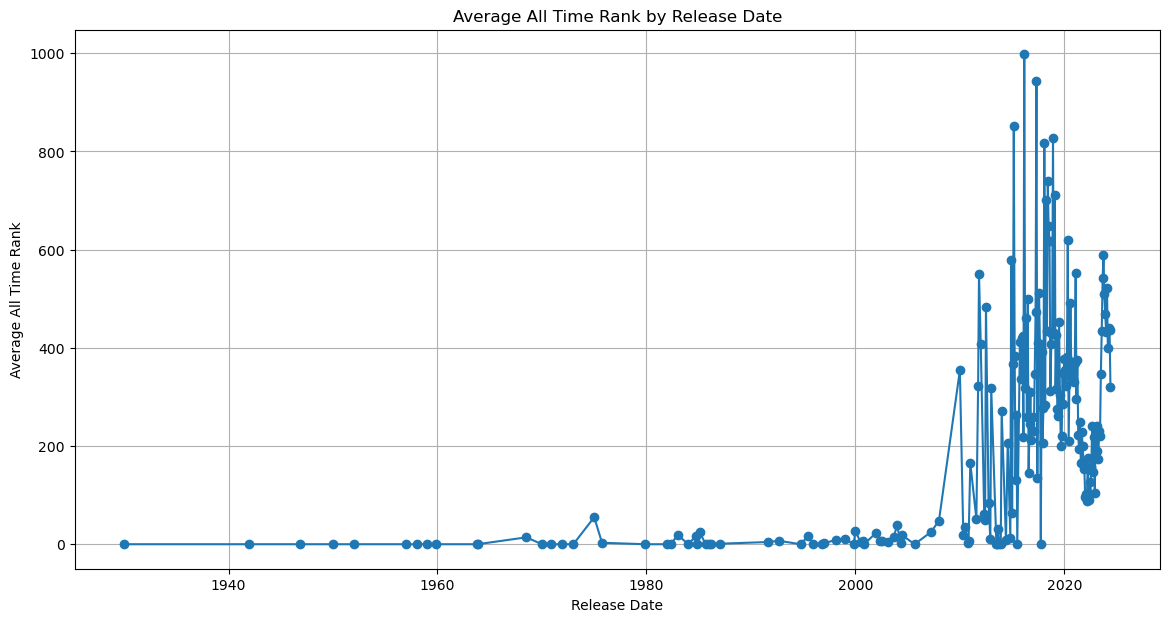

In [39]:
# Convert the combined_analysis data to a format suitable for plotting
combined_analysis['Release Date'] = pd.to_datetime(combined_analysis['Release Year'].astype(str) + '-' + combined_analysis['Release Month'].astype(str))

# Sort the data by release date
combined_analysis = combined_analysis.sort_values('Release Date')

# Plot the data
plt.figure(figsize=(14, 7))
plt.plot(combined_analysis['Release Date'], combined_analysis['All Time Rank'], marker='o')

# Add titles and labels
plt.title('Average All Time Rank by Release Date')
plt.xlabel('Release Date')
plt.ylabel('Average All Time Rank')
plt.grid(True)

# Display the plot
plt.show()